# Recording animal trajectory

## Camera recording

A camera is an optical intrument for aquiring images. Cameras are composed of a sensors (converting photon to electrical signal) and a lens (foccussing light rays on the sensors). 
Many experimental paradigm require the recording of animal motion with one or more camera. 
The experimenter is more interested by the position of the animal in his or her arena (world 
coordinate system) than by the position of the animal within the image (camera-coordinate system). Therefore, we need to transform the position of the animal in the image to its position in the world. To do so, we need to calibrate our camera. This calibration require two steps:

* remove distortion from the lens (intrinsic calibration)
* determine the position and orientation (i.e. pose) of the camera in the environment (extrinsic calibration)

### Direct Linear Transformation (DLT)

When we observe an animal through a camera, we only observe the projection of the animal. For example the center of mass of the animal in three dimension is projected in two dimension on the camera, i.e. in the camera plane, and only these two dimensions are visible from the camera. Mathematically, the point in 3D space is transformed into the camera space. This transformation can be described as follow:

$$
\begin{align}
\begin{bmatrix} u-u_0 \\ v-v_0 \\ -d \end{bmatrix} &= T \begin{bmatrix} x-x_0 \\ y-y_0 \\ z-z_0 \end{bmatrix} \\
&=c \begin{bmatrix} r_{11} & r_{12} & r_{13} \\ r_{21} & r_{22} & r_{23} \\ r_{31} & r_{32} & r_{33} \end{bmatrix}\begin{bmatrix} x-x_0 \\ y-y_0 \\ z-z_0 \end{bmatrix}
\end{align}
$$

with:
* $u$, $v$ the position of the animal on the camera
* $x$, $y$, $z$ the position of the animal in the environment
* $u_0$, $v_0$, the center of the camera
* $x_0$, $y_0$, $z_0$ the center of the environment (origin)
* $d$, the distance between the point on the camera and the point in the environment
* $c$, a constant of colinarity

**Note** The unit of $u$, $v$ , $u_0$, and $v_0$ have the same units than $x,y,z$. However, $u$ and $v$ will be usually measured in pixels, and thus we need to further transform $u$ and $v$ by a constant of proportionality. $u-u_0 \Rightarrow \lambda_u(u-u_0)$, and $v-v_0 \Rightarrow \lambda_v(v-v_0)$.

#### Calibration

We ultimatly want to have the position of the animal within its environment from two or more cameras. To be able to reconstruct (triangulate) the animal position, we first need to have a method to describe the transformation from camera to world and vice versa, i.e. obtained the parameters of the transformation from known points. This process is called camera calibration.

We need to express $u$ and $v$ as a function of $x$, $y$, and $z$. 

$$
u = \frac{L_1x+L_2y+L_3z+L_4}{L_9x+L_{10}y+L_{11}z+L_1}\text{, and }
v = \frac{L_5x+L_6y+L_7z+L_8}{L_9x+L_{10}y+L_{11}z+L_1}
$$

the coefficients $L_1$ to $L_{11}$ are the DLT parameters that reflect the relationships between the environment frame of our animal and the image frame. 

The system of equation above can rewritten as a product of matrices:
$$
\begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} x & y & z & 1 & 0 & 0 & 0 & 0 & -ux & -uy & -uz \\ 0 & 0 & 0 & 0 & x & y & z & 1 & -vx & -vy & -vz  \end{bmatrix}\begin{bmatrix} L_1 \\ L_2 \\ . \\ L_{10} \\ L_{11} \end{bmatrix}
$$

We can expand this equations for $n$ points visible on the camera:

$$
\begin{bmatrix} 
u_1 \\ v_1 \\
u_2 \\ v_2 \\
... \\
u_{n-1} \\ v_{n-1} \\
u_n \\ v_n \\
\end{bmatrix} = 
\begin{bmatrix} 
x_1 & y_1 & z_1 & 1 & 0 & 0 & 0 & 0 & -u_1x_1 & -u_1y_1 & -u_1z_1 \\ 
0 & 0 & 0 & 0 & x_1 & y_1 & z_1 & 1 & -v_1x_1 & -v_1y_1 & -v_1z_1 \\
x_2 & y_2 & z_2 & 1 & 0 & 0 & 0 & 0 & -u_2x_2 & -u_2y_2 & -u_2z_2 \\ 
0 & 0 & 0 & 0 & x_2 & y_2 & z_2 & 1 & -v_2x_2 & -v_2y_2 & -v_2z_2 \\
. \\
x_{n-1} & y_{n-1} & z_{n-1} & 1 & 0 & 0 & 0 & 0 & -u_{n-1}x_{n-1} & -u_{n-1}y_{n-1} & -u_{n-1}z_{n-1} \\ 
0 & 0 & 0 & 0 & x_{n-1} & y_{n-1} & z_{n-1} & 1 & -v_{n-1}x_{n-1} & -v_{n-1}y_{n-1} & -v_{n-1}z_{n-1} \\
x_n & y_n & z_n & 1 & 0 & 0 & 0 & 0 & -u_nx_n & -u_ny_n & -u_nz_n \\ 
0 & 0 & 0 & 0 & x_n & y_n & z_n & 1 & -v_nx_n & -v_ny_n & -v_nz_n \end{bmatrix}
\begin{bmatrix} L_1 \\ L_2 \\ . \\ L_{10} \\ L_{11} \end{bmatrix}
$$


If we have 11 equations or more we can could deterime the DLT parameters from the system of equations. Since each points in the environment will lead to two variables $u$ and $v$, we only need 6 points to be able to obtain the DLT parameters

#### Reconstruction


#### Exercises
* Derive from the $r_11$ to $r_33$, $d$ and $c$ what are $L_1$ to $L_{11}$

#### 16 DLT parameters
The DLT method exposed above does not correct for optical distortion nor de-centering distortion. 

$$
\frac{1}{R}\begin{bmatrix} u \\ v \end{bmatrix} = 
\frac{1}{R}\begin{bmatrix} 
x & y & z & 1 & 0 & 0 & 0 & 0 & -ux & -uy & -uz & \zeta r^2R & \zeta r^4R & \zeta r^6R & (r^2+2\zeta^2)R & \zeta\eta R \\ 
0 & 0 & 0 & 0 & x & y & z & 1 & -vx & -vy & -vz & \eta r^2R & \eta r^4R & \eta r^6R & \zeta\eta R & (r^2+2\eta^2)R\\  \end{bmatrix}\begin{bmatrix} L_1 \\ L_2 \\ . \\ L_{15} \\ L_{16} \end{bmatrix}
$$

with 
* $R=L_9x + L_{10}y + L_{11}z +1$, 
* $r^2 = \eta^2 + \zeta^2$, 
* $\zeta = u-u_0$, and 
* $\eta = v-v_0$ 

### Alternative method

A camera is an optical intrument for aquiring images. Cameras are composed of a sensors (converting photon to electrical signal) and a lens (foccussing light rays on the sensors). 
Many experimental paradigm require the recording of animal motion with one or more camera. 
The experimenter is more interested by the position of the animal in his or her arena (world 
coordinate system) than by the position of the animal within the image (camera-coordinate system). Therefore, we need to transform the position of the animal in the image to its position in the world. To do so, we need to calibrate our camera. This calibration require two steps:

* remove distortion from the lens (intrinsic calibration)
* determine the position and orientation (i.e. pose) of the camera in the environment (extrinsic calibration)

#### Intrinsic calibration

`With Matlab <https://de.mathworks.com/help/vision/ug/single-camera-calibrator-app.html>`_

`With Opencv <https://docs.opencv.org/3.3.1/dc/dbb/tutorial_py_calibration.html>`_

#### Extrinsic calibration

To obtain the pose of the camera (i.e. the extrinsic parameters), we need 
to find a transformation such that the projection of physical points matche
the points position in 3D. In other words, a ray emanating from a projected
points should cross the physical points in 3D.

The estimation of the camera pose is done by solving the PnP with Ransac.
Using Ransac decrease the bad effect that outliers may have on the pose
estimation.

## Building your own manhattan

The manhattan should contains at least 7 towers, and not all towers should
share the same plane or line. For best results it is recommended that the
towers are visible across the entire recorded range on the image. Note,
however, that not all towers need to be visible (at least 7 though).

To create your own manhattan you have to measure all towers (with a precise
rules, or let it build by a workshop). The software need to know the position
of each tower as well. For example you can create a DataFrame containing the
tower number and its position, and save it in hdf file.

In [1]:
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from navipy.arenatools.cam_calib import plot_manhattan as cplot
import matplotlib.pyplot as plt
%matplotlib inline

manhattan_filename = 'manhattan.hdf'
manhattan_key = 'manhattan'
num_points = 27  # Number of points
manhattan_3d = pd.DataFrame(index=range(num_points),
                            columns=['x', 'y', 'z'])
# Then you manually fill the manhattan measurement
manhattan_3d.loc[0, :] = [-10, -10, 4.66]
manhattan_3d.loc[1, :] = [-10, -5, 4.39]
manhattan_3d.loc[2, :] = [-10, -0, 4.63]
manhattan_3d.loc[3, :] = [-10, +5, 4.38]
manhattan_3d.loc[4, :] = [-10, +10, 4.85]

manhattan_3d.loc[5, :] = [-8.09, -0.25, 10.13]

manhattan_3d.loc[6, :] = [-5, -10, 4.52]
manhattan_3d.loc[7, :] = [-5, -5, 4.57]
manhattan_3d.loc[8, :] = [-5, -0, 4.36]
manhattan_3d.loc[9, :] = [-5, +5, 4.45]
manhattan_3d.loc[10, :] = [-5, +10, 4.43]

manhattan_3d.loc[11, :] = [0, -10, 4.70]
manhattan_3d.loc[12, :] = [0, -5, 4.57]
manhattan_3d.loc[13, :] = [0, +5, 4.16]
manhattan_3d.loc[14, :] = [0, +10, 4.43]

manhattan_3d.loc[15, :] = [+5, -10, 4.70]
manhattan_3d.loc[16, :] = [+5, -5, 4.56]
manhattan_3d.loc[17, :] = [+5, -0, 4.27]
manhattan_3d.loc[18, :] = [+5, +5, 4.49]
manhattan_3d.loc[19, :] = [+5, +10, 4.50]

manhattan_3d.loc[20, :] = [+8.62, -8.38, 10.19]
manhattan_3d.loc[21, :] = [+8.55, +8.72, 10.09]

manhattan_3d.loc[22, :] = [+10, -10, 4.51]
manhattan_3d.loc[23, :] = [+10, -5, 4.33]
manhattan_3d.loc[24, :] = [+10, -0, 4.69]
manhattan_3d.loc[25, :] = [+10, +5, 4.69]
manhattan_3d.loc[26, :] = [+10, +10, 4.71]

manhattan_3d *= 10  # Because millimeters are nicer to use than centimeter

The manhattan can be saved as follow, 

```manhattan_3d.to_hdf(manhattan_filename, manhattan_key)```

and plotted

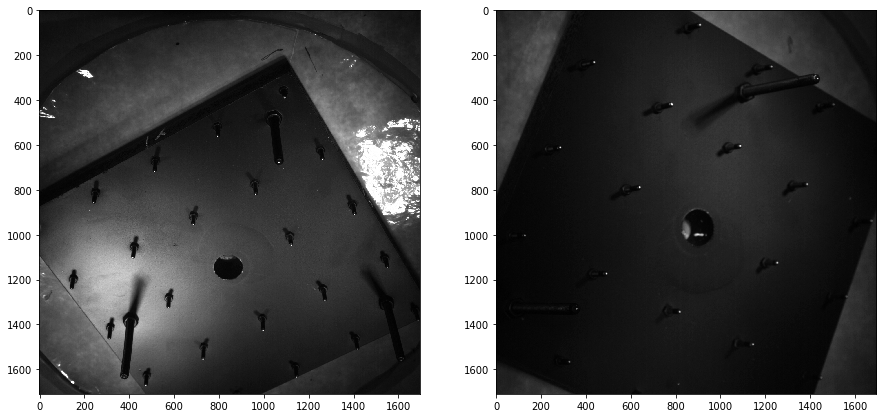

In [2]:
manhattan_imfile = list()
manhattan_imfile.append(pkg_resources.resource_filename(
    'navipy', 'resources/sample_experiment/Doussot_2018a/20180117_cam_0.tif'))
manhattan_imfile.append(pkg_resources.resource_filename(
    'navipy', 'resources/sample_experiment/Doussot_2018a/20180117_cam_2.tif'))

f, axarr = plt.subplots(1, 2, figsize=(15, 8))
for i, ax in enumerate(axarr):
    image = plt.imread(manhattan_imfile[i])
    # Show the manhattan image
    ax.imshow(image, cmap='gray')

* notes the pixel position of each tower

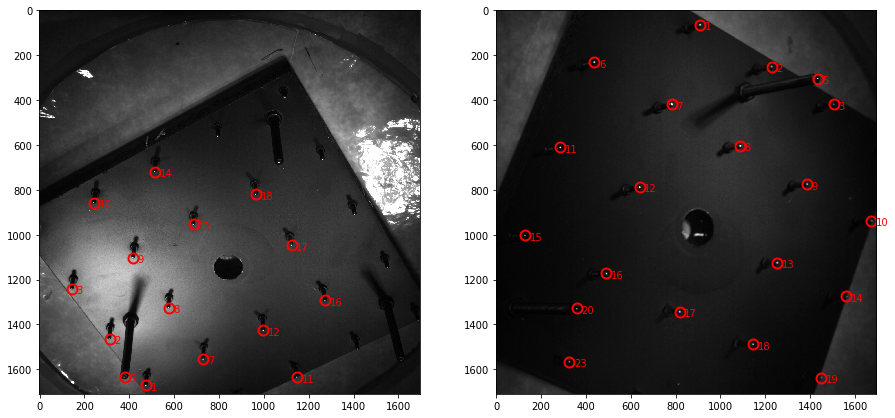

In [3]:
# a filelist for pixels coordinates of towers
filenames_manhattans = list()
filenames_manhattans.append(pkg_resources.resource_filename(
    'navipy', 'resources/sample_experiment/Doussot_2018a/manhattan_cam_0_xypts.csv'))
filenames_manhattans.append(pkg_resources.resource_filename(
    'navipy', 'resources/sample_experiment/Doussot_2018a/manhattan_cam_2_xypts.csv'))

# And then plot 
markersize =2 
f, axarr = plt.subplots(1, 2, figsize=(15, 8))
for i, ax in enumerate(axarr):
    image = plt.imread(manhattan_imfile[i])
    manhattan_2d = pd.read_csv(filenames_manhattans[i],
                               names=['x', 'y'],
                               header=0)

    # Show the manhattan image
    ax.imshow(image, cmap='gray')
    toplotx = manhattan_2d.x
    # Because inverted y axis in image
    toploty = image.shape[0]-manhattan_2d.y
    markersize = 10
    # Plot marker
    ax.plot(toplotx,
            toploty, 'o',
            markersize=markersize,
            markerfacecolor="None",
            markeredgecolor='red',
            markeredgewidth=2)
    # Plot marker label
    for mi, xy in enumerate(zip(toplotx, toploty)):
        if np.any(np.isnan(xy)):
            continue
        ax.text(xy[0]+2*markersize,
                xy[1]+2*markersize,
                '{}'.format(mi), color='r',
                horizontalalignment='left')

* solve the PnPRansac

#### Intrinsic and Extrinsic together

Alternatively you can use Matlab:

`With Matlab <https://de.mathworks.com/help/vision/ref/estimateworldcamerapose.html>`


## Triangulation

In computer vision triangulation refers to the process of determining a point in 3D space given its projections onto two, or more, images. In order to solve this problem it is necessary to know the parameters of the camera projection function from 3D to 2D for the cameras involved, in the simplest case represented by the camera matrices. Triangulation is sometimes also referred to as reconstruction.

The triangulation problem is in theory trivial. Since each point in an image corresponds to a line in 3D space, all points on the line in 3D are projected to the point in the image. If a pair of corresponding points in two, or more images, can be found it must be the case that they are the projection of a common 3D point x. The set of lines generated by the image points must intersect at x (3D point).

Richard Hartley and Andrew Zisserman (2003). Multiple View Geometry in computer vision. Cambridge University Press

### Stereo triangulation

### Multi-view triangulation

#### Pair-wise combination
Triangulating projected points from 2 or more camera can be done  by doing pairwise triangulation, and then calculation of the median.

We need to load n, here n is the number of camera, filename containing the x and y coordinates on the image.

In [4]:
import numpy as np
from navipy.arenatools.triangulate import triangulate_ncam_pairwise
from navipy.io.ivfile import load as ivload
from navipy.io.opencv import load_cameras_calibration
import pkg_resources
# Use the trafile from the resources
# You can adapt this code, by changing trajfile 
# with your own trajectory file
trajfile_side = pkg_resources.resource_filename(
    'navipy',
    'resources/sample_experiment/Lobecke_JEB_2018/Y101_OBFlight_0001_side.tra')
trajfile_top = pkg_resources.resource_filename(
    'navipy',
    'resources/sample_experiment/Lobecke_JEB_2018/Y101_OBFlight_0001_top.tra')
calibfile = pkg_resources.resource_filename(
    'navipy',
    'resources/sample_experiment/Lobecke_JEB_2018/fullcalib_fromtra.xml')

Load the calibration from an xml format (opencv like format)

In [5]:
calib = load_cameras_calibration(calibfile)

 Load the trajectory as seen from the top and side camera

In [6]:
trajdata_side = ivload(trajfile_side)
trajdata_top = ivload(trajfile_top)

Format the data for triangulation

In [7]:
nframes = trajdata_side.shape[0]
ncameras = len(calib)
ncoordinates = 2 # Always two because a camera is a plane
mark_i = 0
pts_cam = np.zeros((ncameras, nframes, ncoordinates))
#First camera
pts_cam[1,:,0]=trajdata_top.loc[:, mark_i].x
pts_cam[1,:,1]=trajdata_top.loc[:, mark_i].y
#Second camera
pts_cam[0,:,0]=trajdata_side.loc[:, mark_i].x
pts_cam[0,:,1]=trajdata_side.loc[:, mark_i].y

and then triangulate.

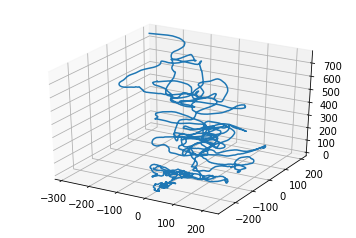

In [8]:
point_3d, p3dunscaled, validcmb = triangulate_ncam_pairwise(calib, pts_cam)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(point_3d[:,0],point_3d[:,1],point_3d[:,2])

#### Single value decomposition



## Conversion to navipy trajectories

### From Matlab to navipy

In [9]:
from scipy.io import loadmat
import numpy as np
import os
from navipy.trajectories import Trajectory
import pkg_resources
# Use the trafile from the resources
# You can adapt this code, by changing trajfile 
# with your own trajectory file
trajfile = pkg_resources.resource_filename(
    'navipy',
    'resources/sample_experiment/Lobecke_JEB_2018/Y101_OBFlight_0001.mat')
csvtrajfile, _ = os.path.splitext(trajfile)
csvtrajfile = csvtrajfile+'.csv'
mymat = loadmat(trajfile)
# matlab files are loaded in a dictionary
# we need to identify, under which key the trajectory has been saved
print(mymat.keys())
key = 'trajectory'
# Arrays are placed in a tupple. We need to access the level
# of the array itself.
mymat = mymat[key][0][0][0]
# The array should be a numpy array, and therefore as the .shape function
# to display the array size:
print(mymat.shape)
# In this example the array has 7661 rows and 4 columns
# the columns are: x,y,z, yaw. Therefore pitch and roll were assumed to be constant (here null)
# We can therefore init a trajectory with the convention for rotation
# often yaw-pitch-roll (i.e. 'rzyx') and with indeces the number of sampling points we have 
# in the trajectory
rotconvention = 'zyx'
indeces = np.arange(0,mymat.shape[0])
mytraj = Trajectory(rotconv = rotconvention, indeces=indeces)
# We now can assign the values
mytraj.x = mymat[:,0]
mytraj.y = mymat[:,1]
mytraj.z = mymat[:,2]
mytraj.alpha_0 = -mymat[:,3] # - because ivTrace
mytraj.alpha_1 = 0
mytraj.alpha_2 = 0
# We can then save mytraj as csv file for example
mytraj.to_csv(csvtrajfile)
mytraj.head()

dict_keys(['__header__', '__version__', '__globals__', 'trajectory', 'nests', 'cylinders'])
(7661, 4)


location                             zyx                
          x           y          z  alpha_0 alpha_1 alpha_2
0  3.056519 -214.990482   9.330593 -2.79751       0       0
1  4.611665 -215.020314   8.424138 -2.80863       0       0
2  4.556650 -214.593236   9.185016 -2.81407       0       0
3  4.643091 -213.829769  10.542035 -2.82704       0       0
4  4.647302 -214.431592   7.461187 -2.82896       0       0

### From csv to navipy

Navipy can read csv files with 7 columns and a two line headers

<table>
<tr>
<td>location</td>
<td>location</td>
<td>location</td>
<td>zyx</td>
<td>zyx</td>
<td>zyx</td>
</tr>
<tr>
<td>x</td>
<td>y</td>
<td>z</td>
<td>alpha_0</td>
<td>alpha_1</td>
<td>alpha_2</td>
</tr>
</table>

But you may have csv file with a different format.

Here we are going to show, how to convert your csv file format to the one required by navipy